In [1]:
'''
This notebook has the spatial enrichment visualizations of the top K genes predicted by PDGrapher to transition from diseased to healthy for a number of cell lines
It compares the spatial enrichment of genes predicted by PDGrapher with spatial enrichment of genes of approved drugs 
* excluding drugs that are in the training set

'''

'\nThis notebook has the spatial enrichment visualizations of the top K genes predicted by PDGrapher to transition from diseased to healthy for a number of cell lines\nIt compares the spatial enrichment of genes predicted by PDGrapher with spatial enrichment of genes of approved drugs \n* excluding drugs that are in the training set\n\n'

In [2]:
## import safepy package
import sys
sys.path.append('../safepy')
from safepy import safe
%matplotlib inline
import pandas as pd

In [3]:
## Parameters
path_to_safe_data='../processed/'

# Visualizing my own network

In [4]:
## initialize the safe object
sf = safe.SAFE(path_to_safe_data=path_to_safe_data)

### Load and display the network

In [5]:
## load network
sf.load_network(network_file='A549_corrected_pos_emb/edge_index_A549.txt')

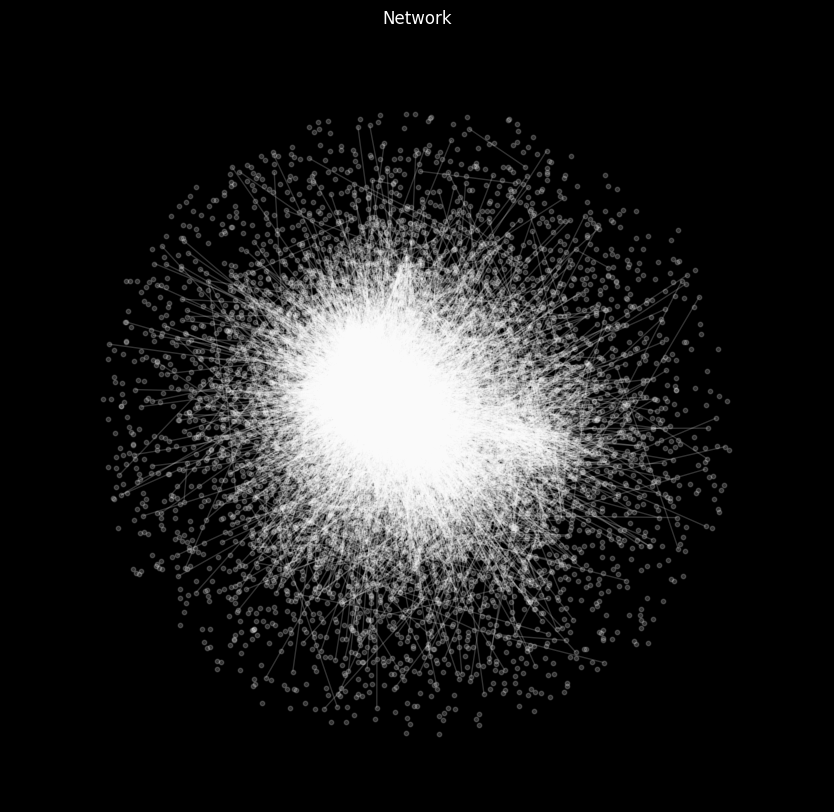

In [6]:
## plot network
ax=sf.plot_network()

### Load the attributes

Here we are using a Gene Ontology (GO) biological process dataset as a set of attributes. These data, just like any other attribute file, needs to be provided in matrix format (genes as rows; GO terms as columns; 1/0 values for each gene annotated/not annotated to a GO term).

This GO matrix can be generated from the GO tree (go-basic.obo file available at http://geneontology.org/docs/download-ontology/) and the species-specific gene-to-GO term annotation file (a gaf file available at http://current.geneontology.org/products/pages/downloads.html) using a script provided in `safepy/utils/make_go.py`.

For more detailed format specifications, check the example attribute file. The main format requirements are:
* the first column contains the node labels (in this case, yeast ORFs)
* each column is an attribute
* the row labels in the attribute file should be matching the node keys in the network.



### Define the local neighborhoods and compute their enrichment for each attribute

In [7]:
sf.define_neighborhoods(node_distance_metric='shortpath_weighted_layout', neighborhood_radius=0.15)

### Plot the enrichment landscapes of a sample of attributes

In [8]:
import os
import os.path as osp
import matplotlib.pyplot as plt
outdir = './images'
os.makedirs(outdir, exist_ok = True)
n_permutations = 1000

## A549

In [9]:
cell_line = 'A549'
real_targets = pd.read_csv('../processed/{}_corrected_pos_emb/{}_corrected_pos_emb_top10.txt'.format(cell_line, cell_line), sep='\t')
real_targets = real_targets[real_targets['Targets of approved drugs'] == 1]['Gene'].tolist()


In [10]:
#########GT targets
k = 1000

sf.load_attributes(attribute_file='{}_corrected_pos_emb/{}_corrected_pos_emb_top{}.txt'.format(cell_line, cell_line, k))

# Explicitly define the node_distance metric and the neighborhood radius
sf.compute_pvalues(num_permutations=n_permutations)
sf.plot_sample_attributes(attributes=['Targets of approved drugs'], vmin=-4, vmax=4, background_color='#ffffff', colors=['3C73B9','F2BC8D'])
                        #  labels = real_targets)
plt.savefig(osp.join(outdir, '{}_gt.pdf'.format(cell_line)), format='pdf')
plt.close()

### PDGrapher predicted top targets

In [11]:
for k in [10, 50, 100]:

    sf.load_attributes(attribute_file='{}_corrected_pos_emb/{}_corrected_pos_emb_top{}.txt'.format(cell_line, cell_line, k))

    # Explicitly define the node_distance metric and the neighborhood radius
    sf.compute_pvalues(num_permutations=n_permutations)
    sf.plot_sample_attributes(attributes=['Top {} predicted targets'.format(k)], vmin=-4, vmax=4, background_color='#ffffff', colors=['3C73B9','F2BC8D'])
                            #  labels = real_targets)
    plt.savefig(osp.join(outdir, '{}_pdgrapher_predicted_top{}.pdf'.format(cell_line, k)), format='pdf')
    plt.close()

### Randomly predicted top targets

In [12]:
#########Random
for k in [10, 50, 100]:

    sf.load_attributes(attribute_file='{}_corrected_pos_emb/{}_corrected_pos_emb_top{}.txt'.format(cell_line, cell_line, k))

    # Explicitly define the node_distance metric and the neighborhood radius
    sf.compute_pvalues(num_permutations=n_permutations)
    sf.plot_sample_attributes(attributes=['Top {} random targets'.format(k)], vmin=-4, vmax=4, background_color='#ffffff', colors=['3C73B9','F2BC8D'])
                            #  labels = real_targets)
    plt.savefig(osp.join(outdir, '{}_random_predicted_top{}.pdf'.format(cell_line, k)), format='pdf')
    plt.close()

## BT20

In [9]:
cell_line = 'BT20'
real_targets = pd.read_csv('../processed/{}_corrected_pos_emb/{}_corrected_pos_emb_top10.txt'.format(cell_line, cell_line), sep='\t')
real_targets = real_targets[real_targets['Targets of approved drugs'] == 1]['Gene'].tolist()


In [10]:
real_targets

['MAPK8',
 'AR',
 'ESR1',
 'PARP1',
 'ERBB2',
 'ERBB3',
 'SHBG',
 'MTOR',
 'CDK6',
 'CDK4',
 'ESR2',
 'PRKCA',
 'NR1I2',
 'KCNH2',
 'ESRRG',
 'CYP19A1',
 'TGFB1',
 'PDCD1',
 'EBP',
 'PARP2',
 'PARP3']

In [11]:
#########GT targets
k = 1000

sf.load_attributes(attribute_file='{}_corrected_pos_emb/{}_corrected_pos_emb_top{}.txt'.format(cell_line, cell_line, k))

# Explicitly define the node_distance metric and the neighborhood radius
sf.compute_pvalues(num_permutations=n_permutations)
sf.plot_sample_attributes(attributes=['Targets of approved drugs'], vmin=-4, vmax=4, background_color='#ffffff', colors=['3C73B9', 'F2BC8D'],
                         labels = real_targets)
plt.savefig(osp.join(outdir, '{}_gt.pdf'.format(cell_line)), format='pdf')
plt.close()

### PDGrapher predicted top targets

In [12]:
for k in [10, 50, 100]:

    sf.load_attributes(attribute_file='{}_corrected_pos_emb/{}_corrected_pos_emb_top{}.txt'.format(cell_line, cell_line, k))

    # Explicitly define the node_distance metric and the neighborhood radius
    sf.compute_pvalues(num_permutations=n_permutations)
    sf.plot_sample_attributes(attributes=['Top {} predicted targets'.format(k)], vmin=-4, vmax=4, background_color='#ffffff', colors=['3C73B9','F2BC8D'],
                             labels = real_targets)
    plt.savefig(osp.join(outdir, '{}_pdgrapher_predicted_top{}.pdf'.format(cell_line, k)), format='pdf')
    plt.close()

### Randomly predicted top targets

In [13]:
#########Random
for k in [10, 50, 100]:

    sf.load_attributes(attribute_file='{}_corrected_pos_emb/{}_corrected_pos_emb_top{}.txt'.format(cell_line, cell_line, k))

    # Explicitly define the node_distance metric and the neighborhood radius
    sf.compute_pvalues(num_permutations=n_permutations)
    sf.plot_sample_attributes(attributes=['Top {} random targets'.format(k)], vmin=-4, vmax=4, background_color='#ffffff', colors=['3C73B9','F2BC8D'],
                             labels = real_targets)
    plt.savefig(osp.join(outdir, '{}_random_predicted_top{}.pdf'.format(cell_line, k)), format='pdf')
    plt.close()

## MCF7

In [18]:
cell_line = 'MCF7'
real_targets = pd.read_csv('../processed/{}_corrected_pos_emb/{}_corrected_pos_emb_top10.txt'.format(cell_line, cell_line), sep='\t')
real_targets = real_targets[real_targets['Targets of approved drugs'] == 1]['Gene'].tolist()


In [19]:
real_targets

['ERBB2', 'ERBB3', 'CDK6', 'CDK4', 'TGFB1', 'PDCD1']

In [20]:
#########GT targets
k = 1000

sf.load_attributes(attribute_file='{}_corrected_pos_emb/{}_corrected_pos_emb_top{}.txt'.format(cell_line, cell_line, k))

# Explicitly define the node_distance metric and the neighborhood radius
sf.compute_pvalues(num_permutations=n_permutations)
sf.plot_sample_attributes(attributes=['Targets of approved drugs'], vmin=-4, vmax=4, background_color='#ffffff', colors=['3C73B9','F2BC8D'],
                         labels = real_targets)
plt.savefig(osp.join(outdir, '{}_gt.pdf'.format(cell_line)), format='pdf')
plt.close()

### PDGrapher predicted top targets

In [21]:
for k in [10, 50, 100]:

    sf.load_attributes(attribute_file='{}_corrected_pos_emb/{}_corrected_pos_emb_top{}.txt'.format(cell_line, cell_line, k))

    # Explicitly define the node_distance metric and the neighborhood radius
    sf.compute_pvalues(num_permutations=n_permutations)
    sf.plot_sample_attributes(attributes=['Top {} predicted targets'.format(k)], vmin=-4, vmax=4, background_color='#ffffff', colors=['3C73B9','F2BC8D'],
                             labels = real_targets)
    plt.savefig(osp.join(outdir, '{}_pdgrapher_predicted_top{}.pdf'.format(cell_line, k)), format='pdf')
    plt.close()

### Randomly predicted top targets

In [22]:
#########Random
for k in [10, 50, 100]:

    sf.load_attributes(attribute_file='{}_corrected_pos_emb/{}_corrected_pos_emb_top{}.txt'.format(cell_line, cell_line, k))

    # Explicitly define the node_distance metric and the neighborhood radius
    sf.compute_pvalues(num_permutations=n_permutations)
    sf.plot_sample_attributes(attributes=['Top {} random targets'.format(k)], vmin=-4, vmax=4, background_color='#ffffff', colors=['3C73B9','F2BC8D'],
                             labels = real_targets)
    plt.savefig(osp.join(outdir, '{}_random_predicted_top{}.pdf'.format(cell_line, k)), format='pdf')
    plt.close()